In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("titanic train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("titanic test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print("Number of columns in training data:\n",train_data.columns.values)
print("\nNumber of columns in testing data:\n",test_data.columns.values)

Number of columns in training data:
 ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']

Number of columns in testing data:
 ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [5]:
print("Train data shape: ",train_data.shape)
print("\nTest data shape: ",test_data.shape)

Train data shape:  (891, 12)

Test data shape:  (418, 11)


In [6]:
print("Describe training data:\n",train_data.describe())

Describe training data:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
print("Describe test data:\n",test_data.describe())

Describe test data:
        PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [8]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [9]:
print('\nNumber of null values in train data:\n',train_data.isnull().sum())
print('\nNumber of null values in test data:\n',test_data.isnull().sum())


Number of null values in train data:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Number of null values in test data:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

train_data = train_data.drop(['Ticket'], axis = 1)
test_data = test_data.drop(['Ticket'], axis = 1)

train_data['Embarked'] = train_data['Embarked'].fillna('S')
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [11]:
# let check missing value again
print('\nNumber of null values in train data\n',train_data.isnull().sum())
print('\n Number of null values in test data\n',test_data.isnull().sum())


Number of null values in train data
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

 Number of null values in test data
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [12]:
train_data.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [13]:
train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [16]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [17]:
train_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<Axes: xlabel='Survived', ylabel='count'>

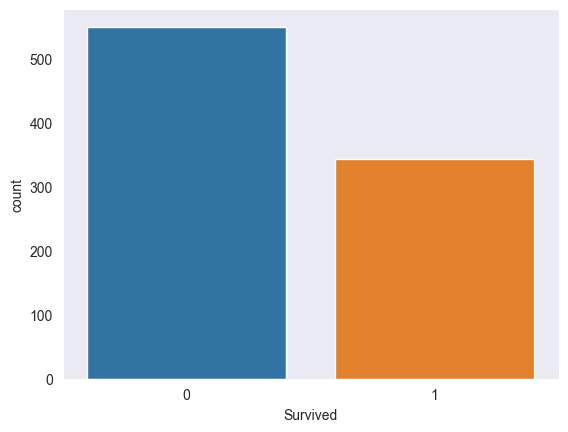

In [18]:
sns.countplot(x = 'Survived', data = train_data)

<Axes: xlabel='Sex', ylabel='Survived'>

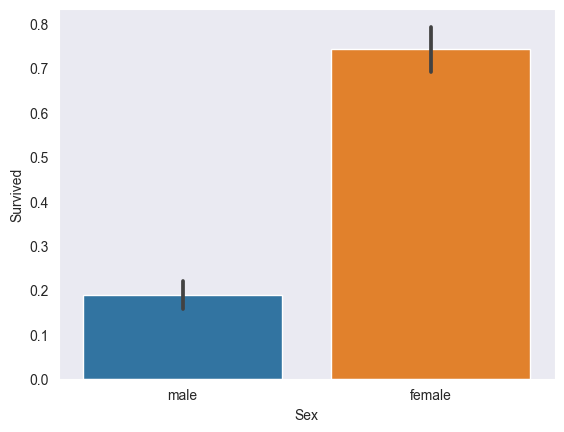

In [19]:
sns.barplot(x="Sex", y="Survived", data=train_data)

<Axes: xlabel='Pclass', ylabel='Survived'>

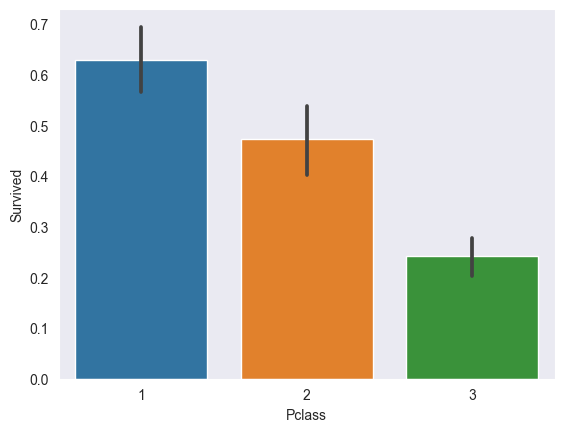

In [20]:
sns.barplot(x="Pclass", y="Survived", data=train_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

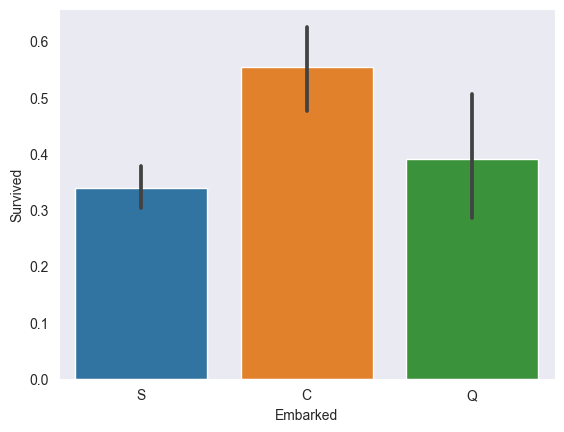

In [21]:
sns.barplot(x = "Embarked", y = "Survived", data = train_data)

<Axes: xlabel='Parch', ylabel='Survived'>

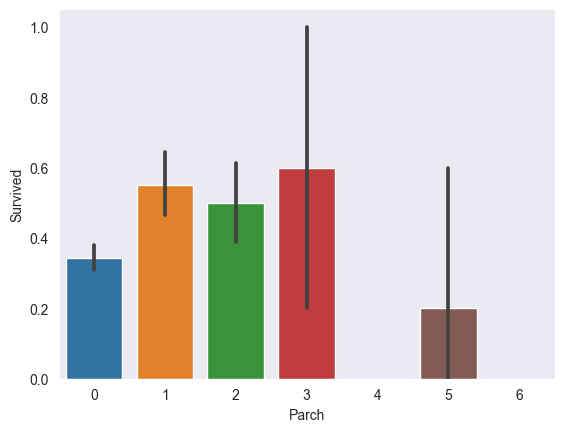

In [22]:
sns.barplot(x="Parch", y="Survived", data=train_data)

<Axes: xlabel='Age', ylabel='Survived'>

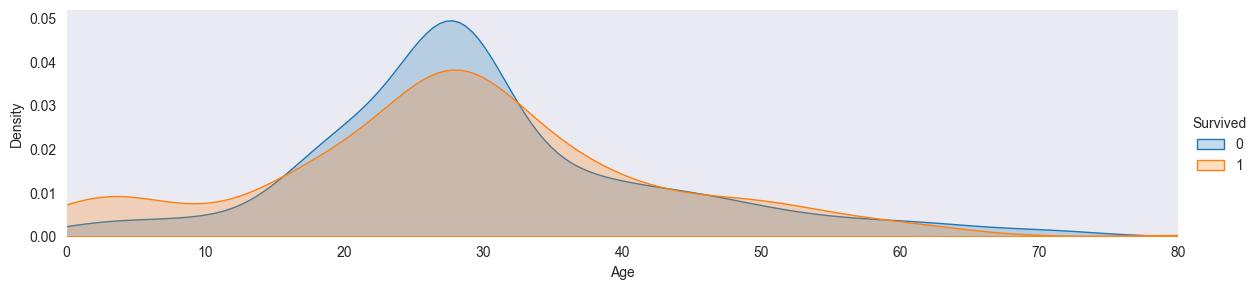

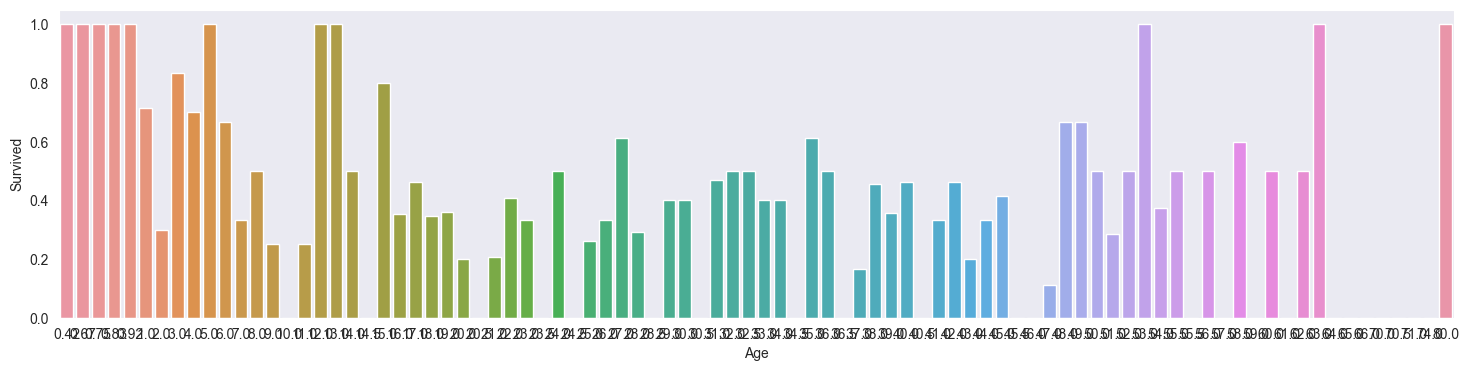

In [23]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

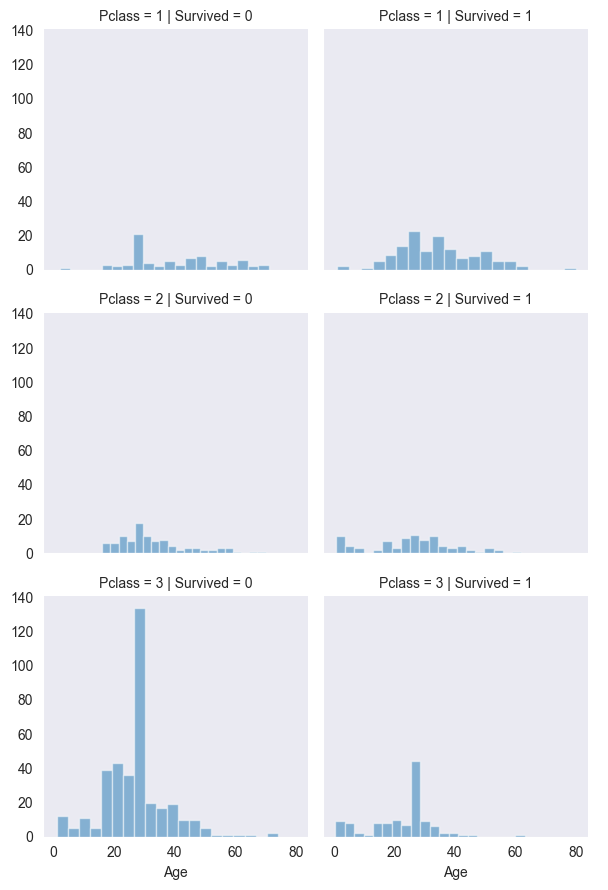

In [24]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

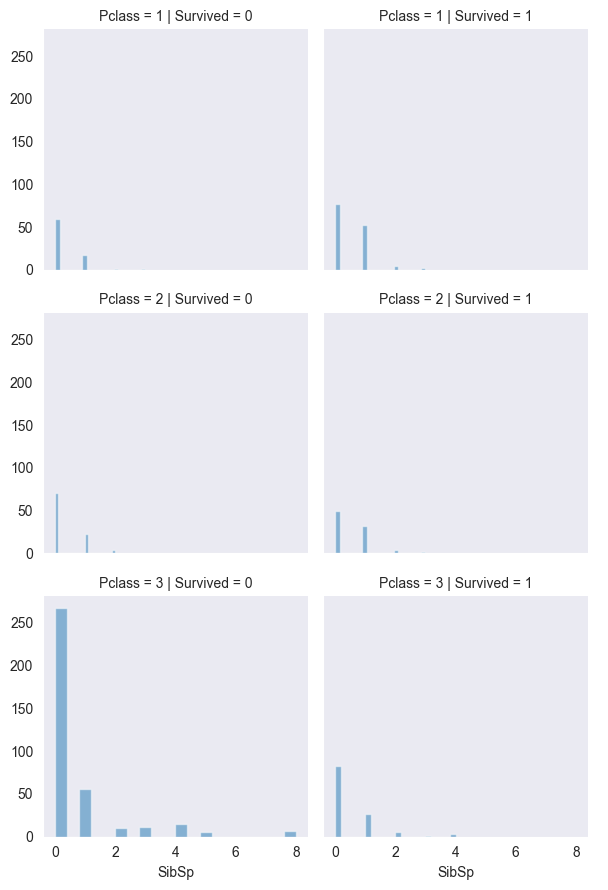

In [25]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
grid.map(plt.hist, 'SibSp', alpha=.5, bins=20)
grid.add_legend();

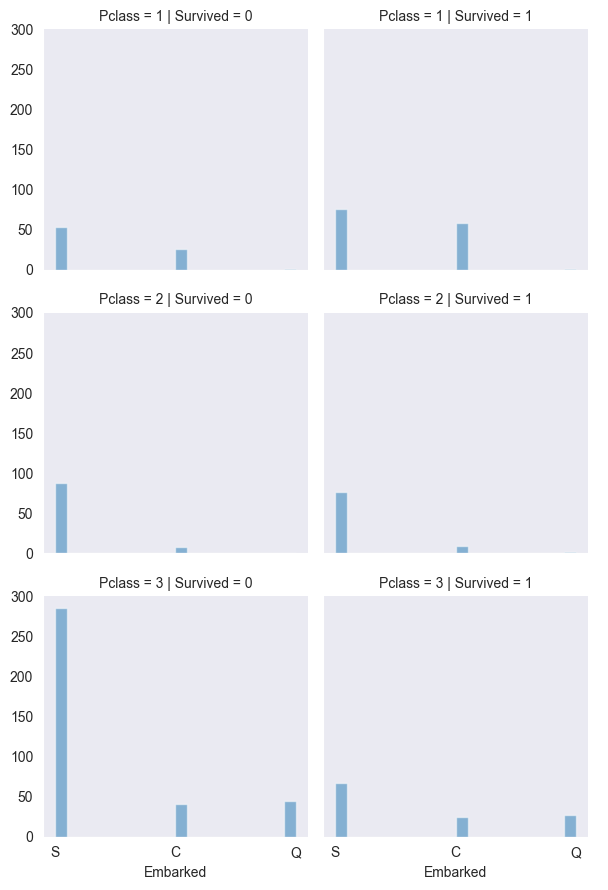

In [26]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass')
grid.map(plt.hist, 'Embarked', alpha=.5, bins=20)
grid.add_legend();

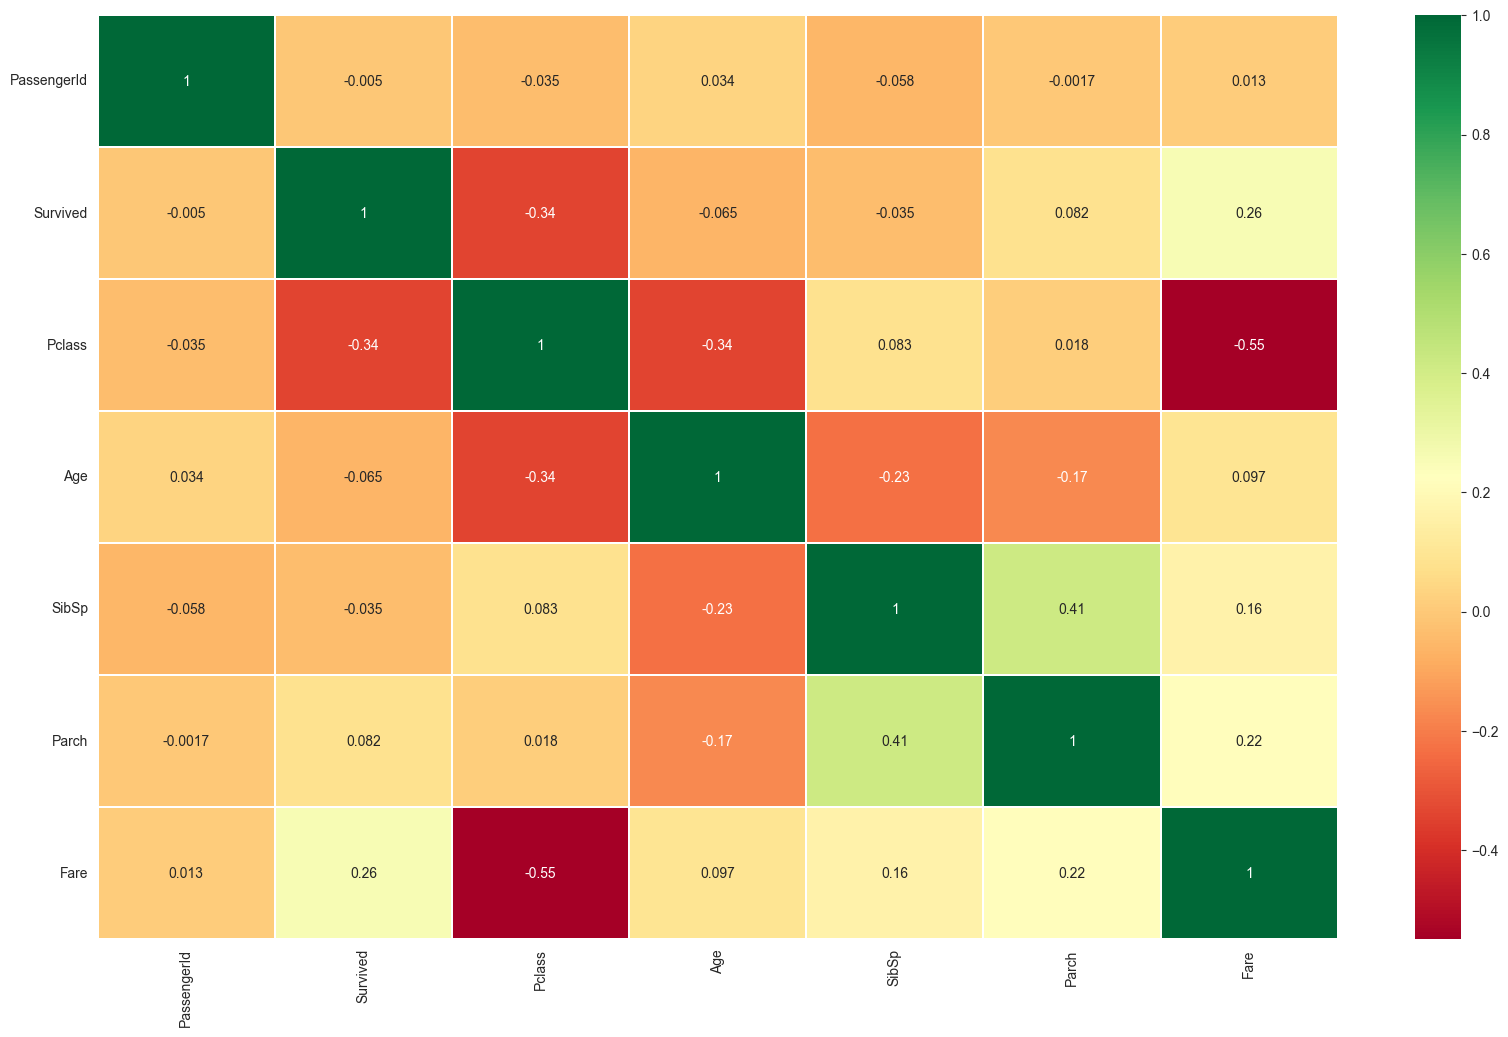

In [27]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [28]:
train_data['Sex'] = train_data['Sex'].map({'male':1, 'female':0})
test_data['Sex'] = test_data['Sex'].map({'male':1, 'female':0})

In [29]:
train_data['Embarked'] = train_data['Embarked'].map({'Q':2, 'S':1, 'C':0})
test_data['Embarked'] = test_data['Embarked'].map({'Q':2, 'S':1, 'C':0})

In [30]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [31]:
X_train = train_data.drop(["Name", "Survived", "PassengerId"], axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop(['Name',"PassengerId"], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [32]:
svc = SVC()
svc.fit(X_train, Y_train)
svm_Y_pred = svc.predict(X_test)
svc_accuracy = svc.score(X_train, Y_train)
svc_accuracy

0.6823793490460157

In [33]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_train, Y_train)
knn_accuracy

0.8395061728395061

In [34]:
# k-nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_train, Y_train)
knn_accuracy

0.8395061728395061

In [35]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
guassian_Y_pred = gaussian.predict(X_test)
gaussian_accuracy = gaussian.score(X_train, Y_train)
gaussian_accuracy

0.7912457912457912

In [36]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
linear_svc_Y_pred = linear_svc.predict(X_test)
linear_svc_accuracy = linear_svc.score(X_train, Y_train)
linear_svc_accuracy

0.7845117845117845

In [37]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_Y_pred = sgd.predict(X_test)
sgd_accuracy = sgd.score(X_train, Y_train)
sgd_accuracy

0.7744107744107744

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
decision_tree_Y_pred = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_train, Y_train)
decision_tree_accuracy

0.9797979797979798

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
random_forest_accuracy = random_forest.score(X_train, Y_train)
random_forest_accuracy

0.9797979797979798

In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Gaussian Naive Bayes', 'Linear SVC',
              'Stochastic Gradient Decent', 'Decision Tree','Random Forest'],
    'Score': [svc_accuracy, knn_accuracy, gaussian_accuracy, linear_svc_accuracy, 
              sgd_accuracy, decision_tree_accuracy, random_forest_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.979798
6,Random Forest,0.979798
1,KNN,0.839506
2,Gaussian Naive Bayes,0.791246
3,Linear SVC,0.784512
4,Stochastic Gradient Decent,0.774411
0,Support Vector Machines,0.682379


In [41]:
svm_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": svm_Y_pred})
svm_submission.to_csv('svm_submission.csv', index=False)

knn_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": knn_Y_pred})
knn_submission.to_csv('knn_submission.csv', index=False)

guassian_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": guassian_Y_pred})
guassian_submission.to_csv('guassian_submission.csv', index=False)

linear_svc_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": linear_svc_Y_pred})
linear_svc_submission.to_csv('linear_svc_submission.csv', index=False)

sgd_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": sgd_Y_pred})
sgd_submission.to_csv('sgd_submission.csv', index=False)

decision_tree_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": decision_tree_Y_pred})
decision_tree_submission.to_csv('decision_tree_submission.csv', index=False)

random_forest_submission = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": random_forest_Y_pred})
random_forest_submission.to_csv('random_forest_submission.csv', index=False)